# Feature selection

## Time related features

- Hour of the day
- Day of week
- Day of the year
- Month
- Season (Winter/Summer)
- Weekends/Holidays

## Weather features

- Temperature
- Cloud coverage
- Humidity
- Heating degrees

## Weather area coverage
- Number of cities to choose
- Share of population
- Geographical distribution

## Demand prediction
- Wind day-ahead generation
- Solar day-ahead generation

## Market forces

- Production costs
- Natural gas prices

# Feature Engineering

## Convert a Time Series to a Supervised Learning Problem in Python

## Scaler
- Min-Max Scaler

## Train Test split
- Some studies have concluded that a 33/67 split ratio optimizes model performance

# Model performance

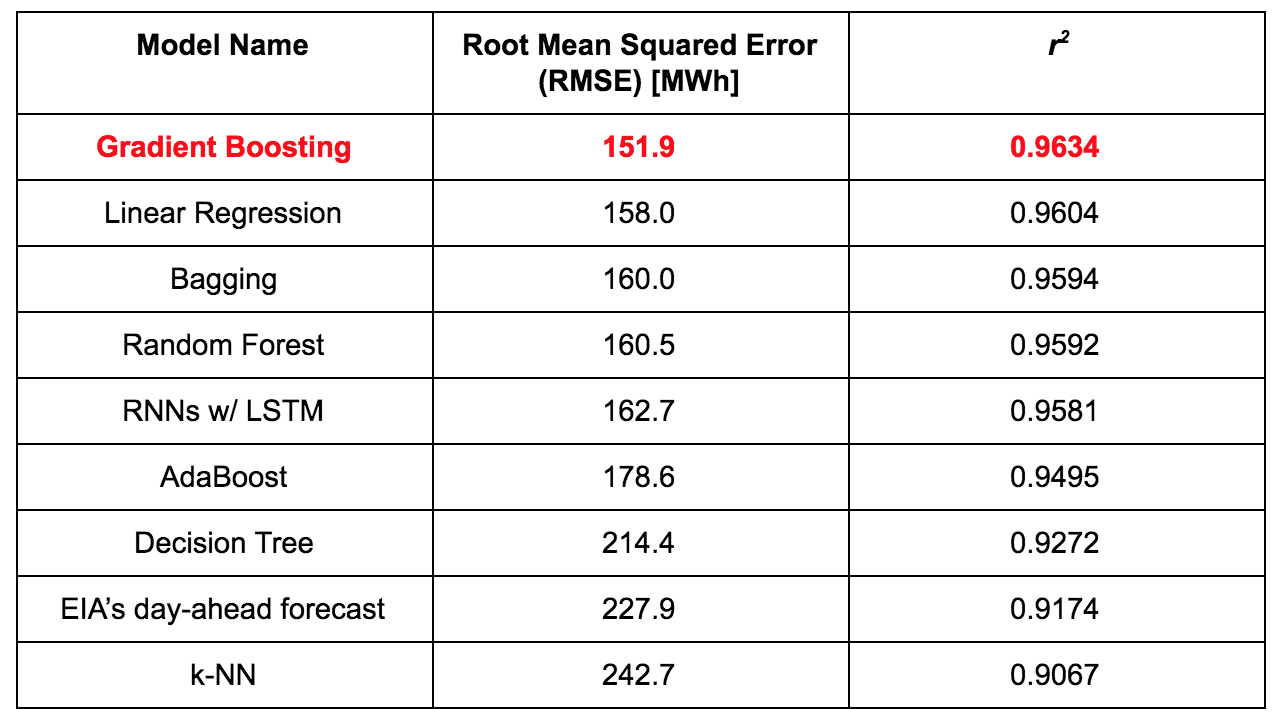

# Data exploration

## Data preprocessing

In [557]:
import os
import pandas as pd

path = "/Users/vingtcoeurs/code/Guli-Y/electricity_price_predictor/raw_data"
df = pd.read_csv(os.path.join(path,"cleaned_df.csv"))
df.head()

,Unnamed: 0,Day-ahead Price [EUR/MWh],time,Actual Total Load [MW] - BZN|DK1
0,0,25.02,2015-01-01 00:00:00,1877.0
1,1,18.29,2015-01-01 01:00:00,1843.0
2,2,16.04,2015-01-01 02:00:00,1795.0
3,3,14.60,2015-01-01 03:00:00,1745.0
4,4,14.95,2015-01-01 04:00:00,1743.0


In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51702 entries, 0 to 51701
Data columns (total 4 columns):
Unnamed: 0                          51702 non-null int64
Day-ahead Price [EUR/MWh]           51702 non-null float64
time                                51702 non-null object
Actual Total Load [MW] - BZN|DK1    51702 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ MB


In [559]:
loads = df.copy().drop(columns="Unnamed: 0")
new_columns=["day_ahead_price","timestamp","total_demand"]
loads.columns = new_columns
loads = loads[["timestamp","day_ahead_price","total_demand"]]
loads.head()

,timestamp,day_ahead_price,total_demand
0,2015-01-01 00:00:00,25.02,1877.0
1,2015-01-01 01:00:00,18.29,1843.0
2,2015-01-01 02:00:00,16.04,1795.0
3,2015-01-01 03:00:00,14.60,1745.0
4,2015-01-01 04:00:00,14.95,1743.0


In [560]:
loads["time"] = pd.to_datetime(loads["timestamp"])
loads.head()

,timestamp,day_ahead_price,total_demand,time
0,2015-01-01 00:00:00,25.02,1877.0,2015-01-01 00:00:00
1,2015-01-01 01:00:00,18.29,1843.0,2015-01-01 01:00:00
2,2015-01-01 02:00:00,16.04,1795.0,2015-01-01 02:00:00
3,2015-01-01 03:00:00,14.60,1745.0,2015-01-01 03:00:00
4,2015-01-01 04:00:00,14.95,1743.0,2015-01-01 04:00:00


In [561]:
loads["day_of_month"] = loads["time"].dt.day
loads["month"] = loads["time"].dt.month
loads["month_name"] = loads["time"].dt.month_name()
loads["year"] = loads["time"].dt.year
loads["day_of_week"] = loads["time"].dt.weekday+1
loads["weekday_name"] = loads["time"].dt.weekday_name
loads["hour"] = loads["time"].dt.hour
loads.tail()

,timestamp,day_ahead_price,total_demand,time,day_of_month,month,month_name,year,day_of_week,weekday_name,hour
51697,2020-11-23 07:00:00,4.08,3182.0,2020-11-23 07:00:00,23,11,November,2020,1,Monday,7
51698,2020-11-23 08:00:00,6.99,3255.0,2020-11-23 08:00:00,23,11,November,2020,1,Monday,8
51699,2020-11-23 09:00:00,6.95,3213.0,2020-11-23 09:00:00,23,11,November,2020,1,Monday,9
51700,2020-11-23 10:00:00,5.92,3181.0,2020-11-23 10:00:00,23,11,November,2020,1,Monday,10
51701,2020-11-23 11:00:00,4.95,3167.0,2020-11-23 11:00:00,23,11,November,2020,1,Monday,11


In [562]:
loads["calendar_month"] = loads["month_name"].astype(str)+"_"+loads["year"].astype(str)
loads.head()

,timestamp,day_ahead_price,total_demand,time,day_of_month,month,month_name,year,day_of_week,weekday_name,hour,calendar_month
0,2015-01-01 00:00:00,25.02,1877.0,2015-01-01 00:00:00,1,1,January,2015,4,Thursday,0,January_2015
1,2015-01-01 01:00:00,18.29,1843.0,2015-01-01 01:00:00,1,1,January,2015,4,Thursday,1,January_2015
2,2015-01-01 02:00:00,16.04,1795.0,2015-01-01 02:00:00,1,1,January,2015,4,Thursday,2,January_2015
3,2015-01-01 03:00:00,14.60,1745.0,2015-01-01 03:00:00,1,1,January,2015,4,Thursday,3,January_2015
4,2015-01-01 04:00:00,14.95,1743.0,2015-01-01 04:00:00,1,1,January,2015,4,Thursday,4,January_2015


In [698]:
import holidays
holidays = holidays.DK
all_holidays = []
for y in range(2015,2021):
    for day in holidays(years=y).keys(): 
        all_holidays.append(day)

In [749]:
a = [f"{all_holidays[i]}" for i in range(len(all_holidays))]
b = datetime.strptime(a[0],"%Y-%m-%d")
c = datetime.timestamp(datetime.strptime(a[0],"%Y-%m-%d"))
loads["time"][0] == c

False

In [722]:
datetime.fromtimestamp(loads["time"][0])

TypeError: an integer is required (got type Timestamp)

In [721]:
loads["time"][0].strftime("%Y,%m,%d")

'2015,01,01'

## Data exploration

### Data visualization

In [563]:
loads_per_hour = loads.set_index("time")
loads_per_hour.head()

,timestamp,day_ahead_price,total_demand,day_of_month,month,month_name,year,day_of_week,weekday_name,hour,calendar_month
time,,,,,,,,,,,
2015-01-01 00:00:00,2015-01-01 00:00:00,25.02,1877.0,1,1,January,2015,4,Thursday,0,January_2015
2015-01-01 01:00:00,2015-01-01 01:00:00,18.29,1843.0,1,1,January,2015,4,Thursday,1,January_2015
2015-01-01 02:00:00,2015-01-01 02:00:00,16.04,1795.0,1,1,January,2015,4,Thursday,2,January_2015
2015-01-01 03:00:00,2015-01-01 03:00:00,14.60,1745.0,1,1,January,2015,4,Thursday,3,January_2015
2015-01-01 04:00:00,2015-01-01 04:00:00,14.95,1743.0,1,1,January,2015,4,Thursday,4,January_2015


<AxesSubplot:xlabel='time', ylabel='total_demand'>

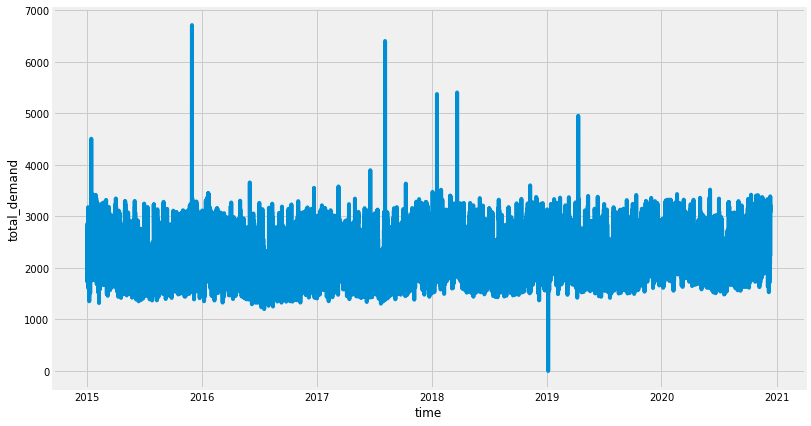

In [564]:
plt.figure(figsize=(12,7))
sns.lineplot(x="time",y="total_demand",data=loads_per_hour)

### Statistic summary

In [565]:
targets = loads[["total_demand","day_ahead_price"]]
targets.describe()

,total_demand,day_ahead_price
count,51702.000000,51702.000000
mean,2279.142473,31.119147
std,452.290332,15.000098
min,0.000000,-58.800000
25%,1910.000000,22.362500
50%,2242.000000,30.200000
75%,2654.000000,39.980000
max,6712.000000,200.040000


### Distribution of targets

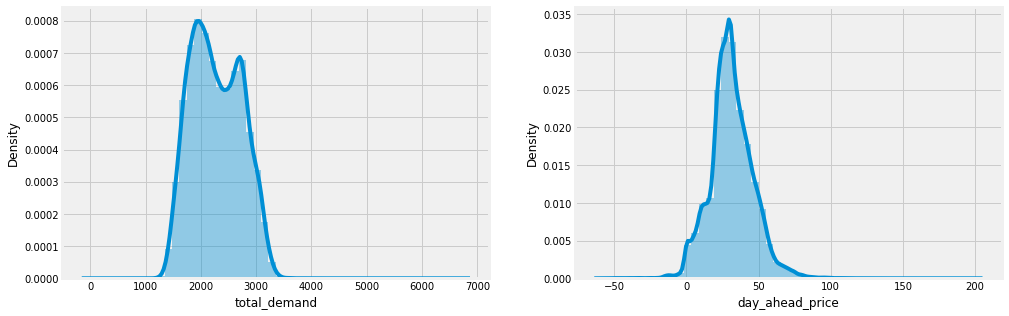

In [566]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
for ax, col in zip(axs, targets.columns): 
    sns.distplot(targets[col], ax=ax,)

Demand seems to have bimodal distribution (off peak/peak hours structure) while Prices has quasi normal distribution with skew to the left 

### Demand

#### Demand - overall trend of rising consumption

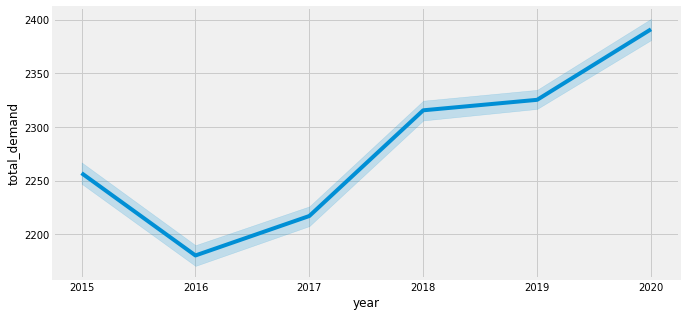

In [567]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
sns.lineplot(x="year",y="total_demand",data=loads);

#### Demand - Hourly seasonality

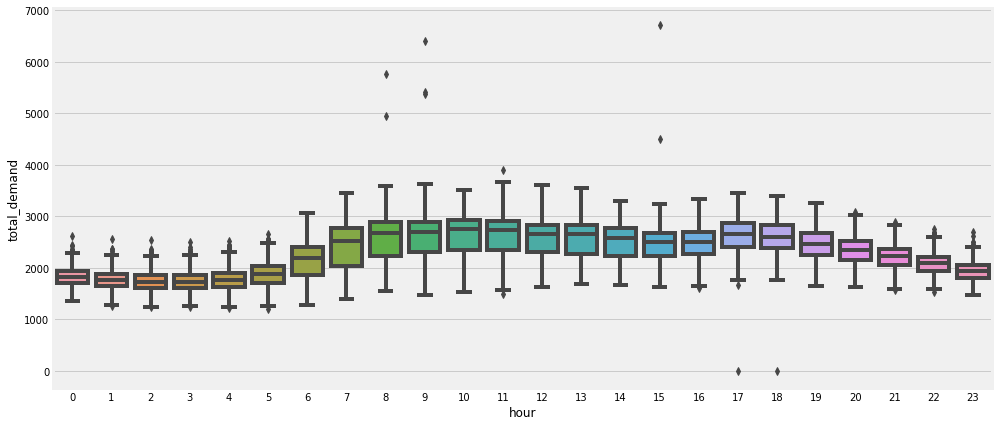

In [568]:
plt.figure(figsize=(15,7))
sns.boxplot(x="hour",y="total_demand",data=loads);

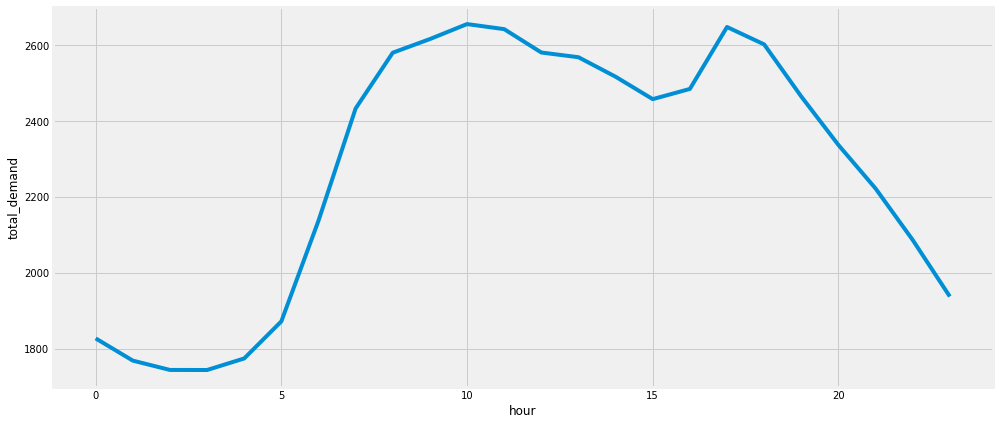

In [569]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='hour', y='total_demand',ci=None);

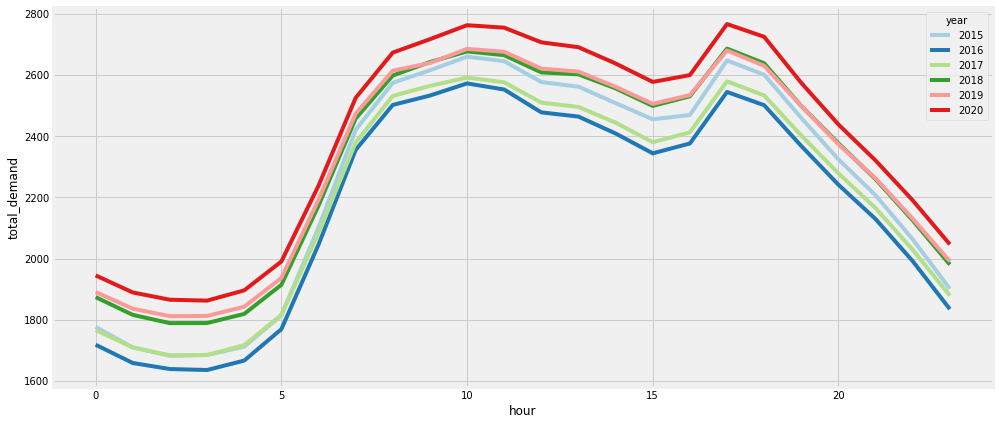

In [570]:
plt.figure(figsize=(15,7))
sns.lineplot(x="hour",y="total_demand",hue="year",data=loads,ci=None,palette="Paired");

#### Demand - Week seasonality

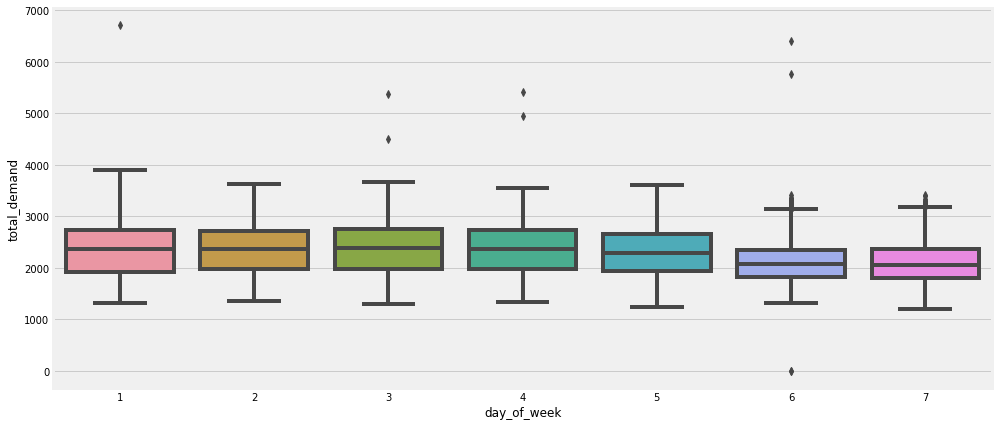

In [571]:
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_week",y="total_demand",data=loads);

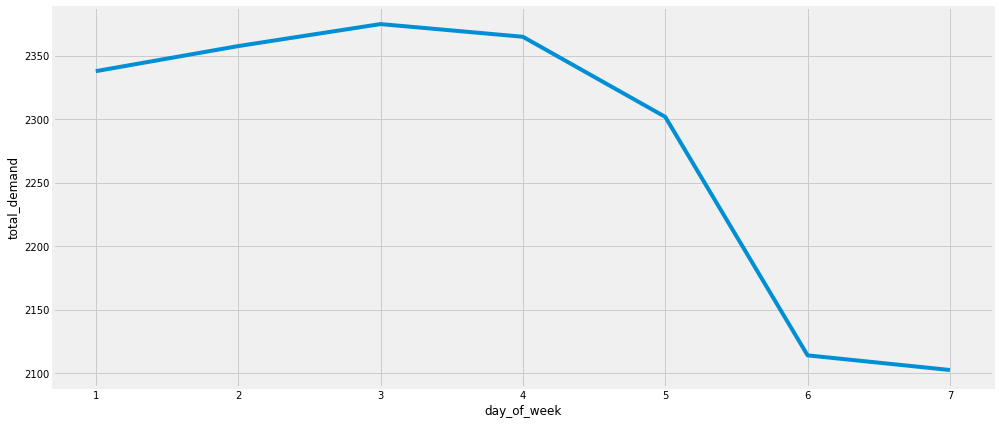

In [572]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='day_of_week', y='total_demand',ci=None);

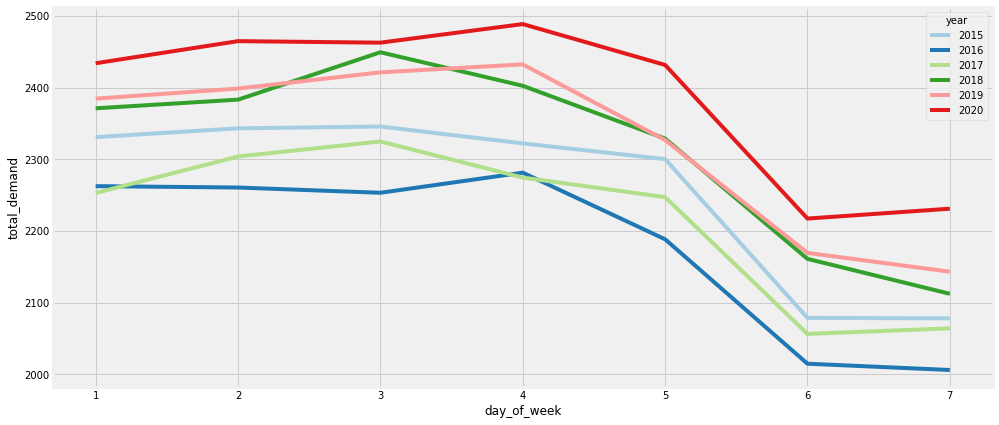

In [573]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_week",y="total_demand",hue="year",data=loads,ci=None,palette="Paired");

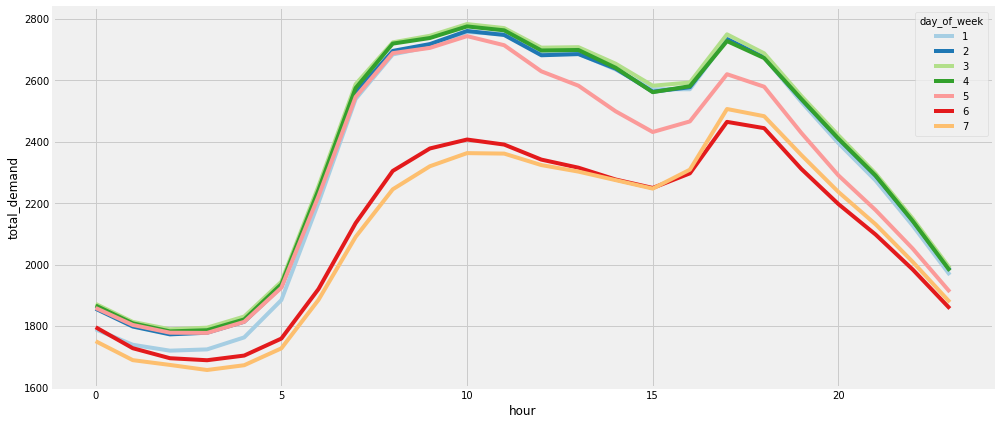

In [574]:
plt.figure(figsize=(15,7))
sns.lineplot(x="hour",y="total_demand",hue="day_of_week",data=loads,ci=None,palette="Paired");

#### Demand - Month seasonality

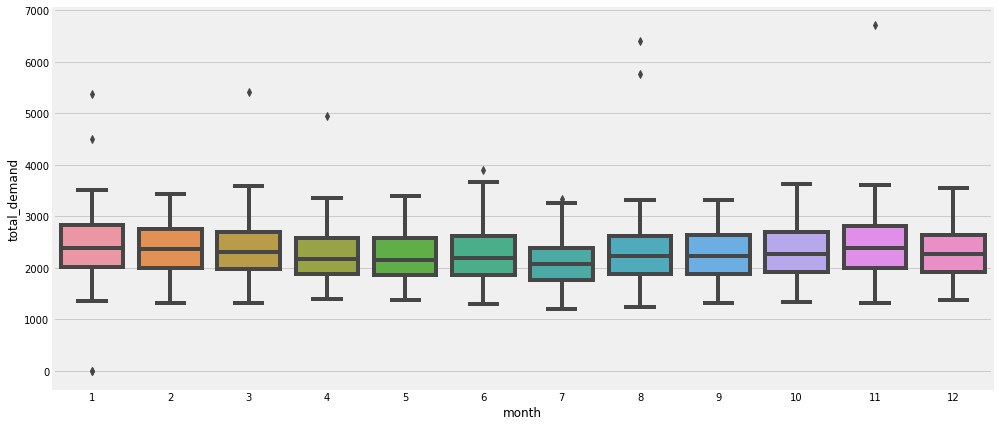

In [575]:
plt.figure(figsize=(15,7))
sns.boxplot(x="month",y="total_demand",data=loads);

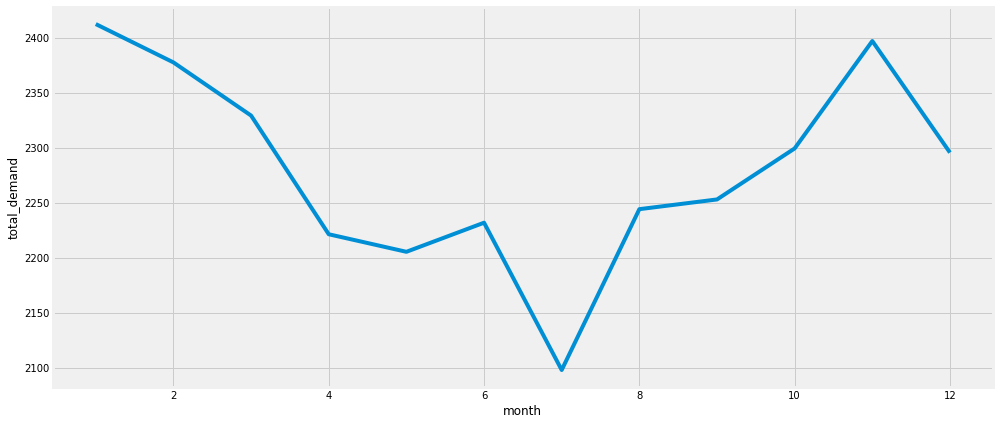

In [576]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='month', y='total_demand',ci=None);

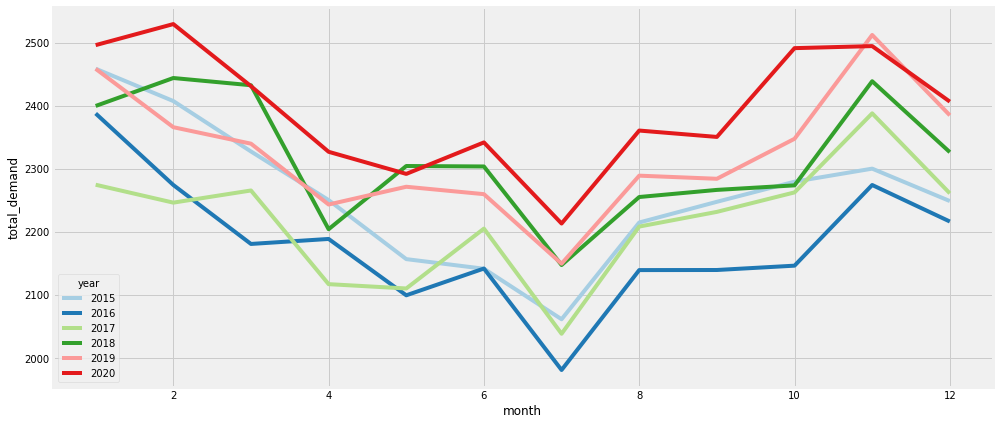

In [577]:
plt.figure(figsize=(15,7))
sns.lineplot(x="month",y="total_demand",hue="year",data=loads,ci=None,palette="Paired");

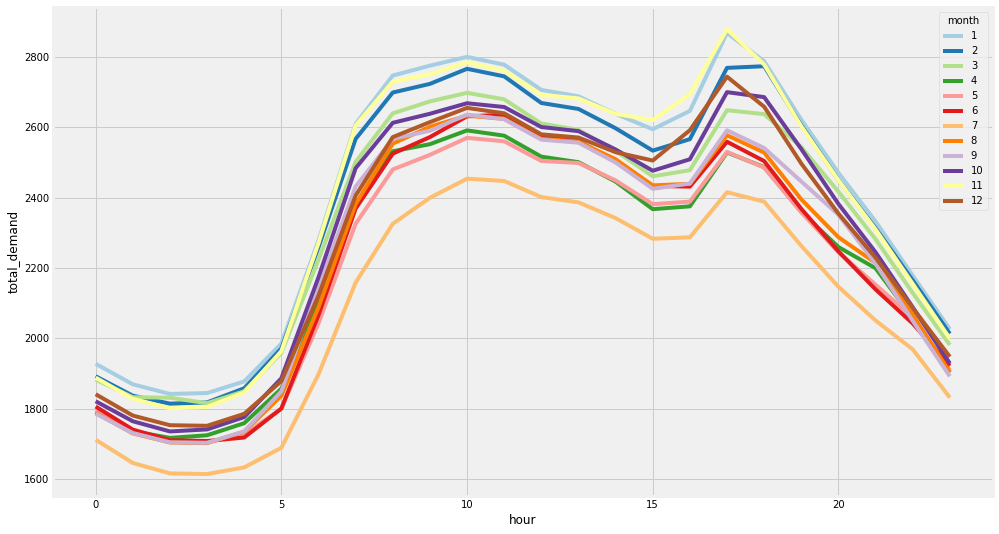

In [578]:
plt.figure(figsize=(15,9))
sns.lineplot(x="hour",y="total_demand",hue="month",data=loads,ci=None,palette="Paired");

### Prices

#### Prices - overall trend - Peak in 2018 before return to 2015 values

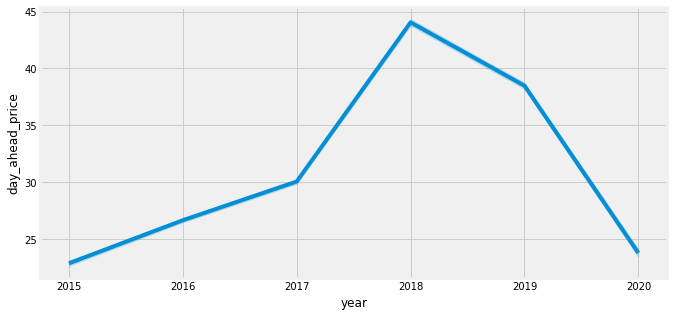

In [579]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year",y="day_ahead_price",data=loads);

#### Prices - Hourly seasonality

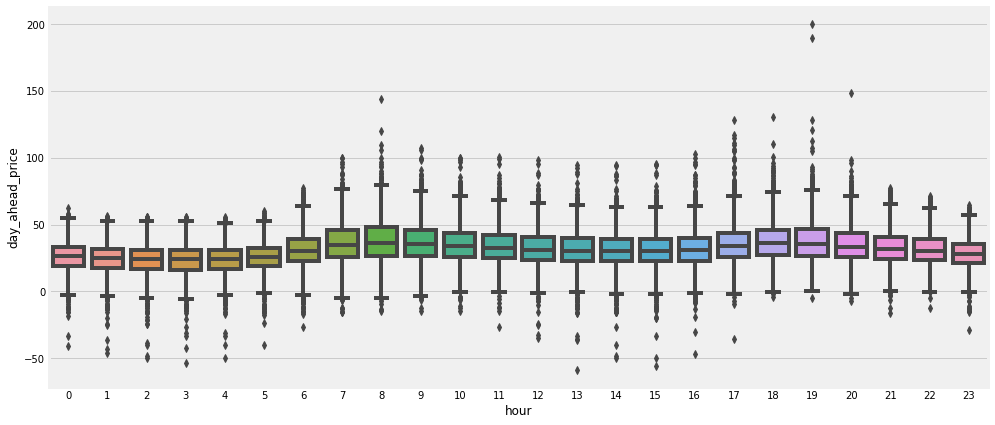

In [580]:
plt.figure(figsize=(15,7))
sns.boxplot(x="hour",y="day_ahead_price",data=loads);

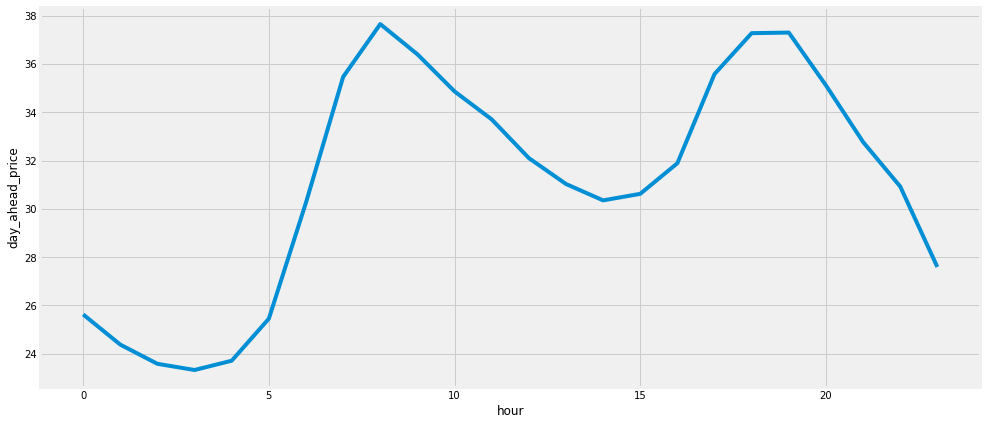

In [581]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='hour', y='day_ahead_price',ci=None);

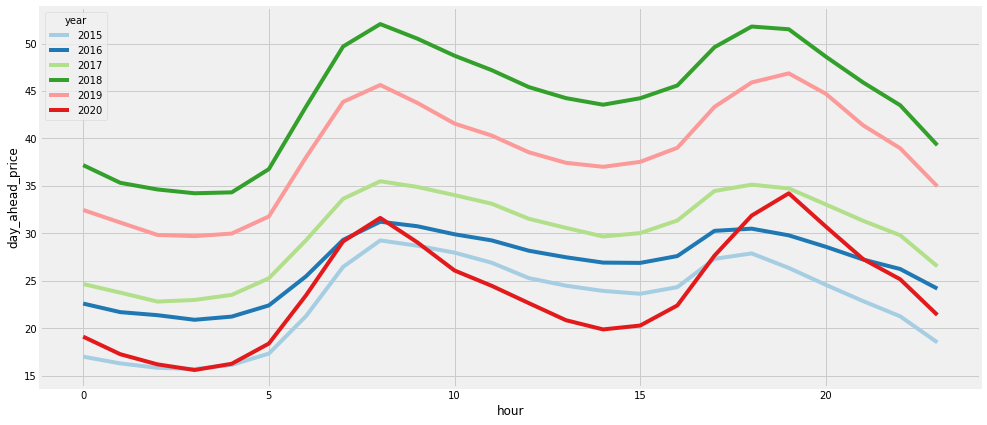

In [582]:
plt.figure(figsize=(15,7))
sns.lineplot(x="hour",y='day_ahead_price',hue="year",data=loads,ci=None,palette="Paired");

#### Prices - Week seasonality

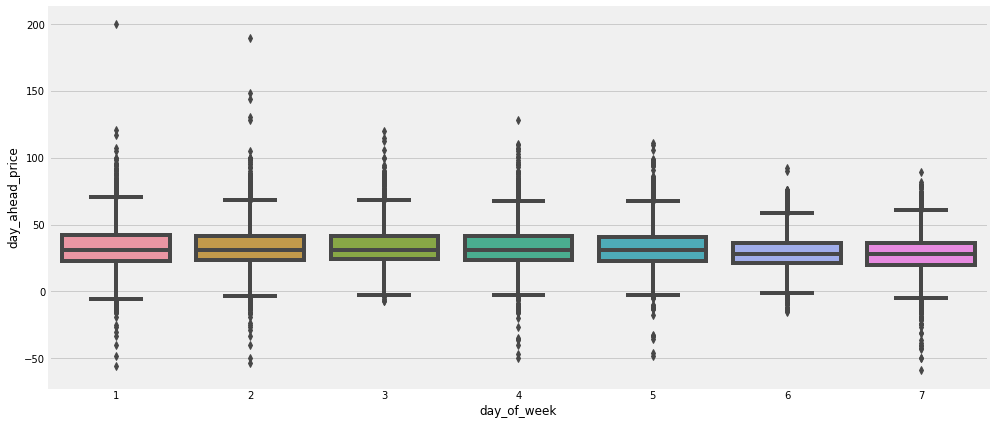

In [583]:
plt.figure(figsize=(15,7))
sns.boxplot(data=loads, x="day_of_week", y='day_ahead_price');

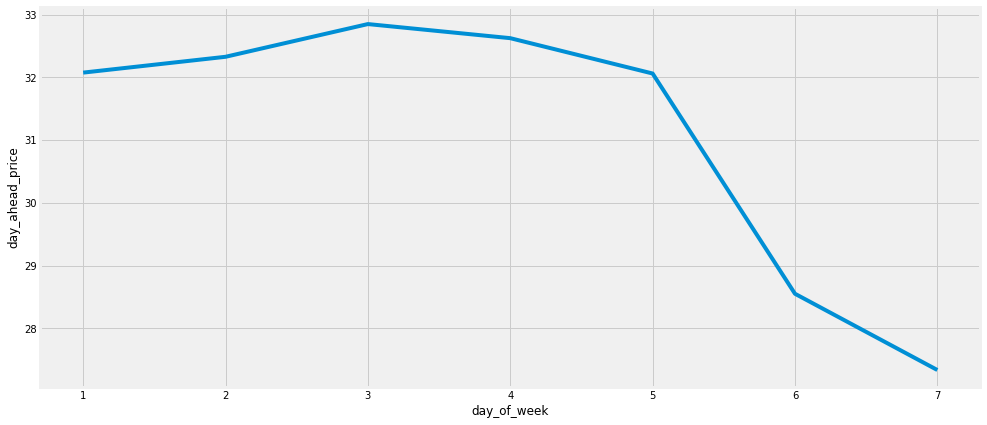

In [584]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x="day_of_week", y="day_ahead_price",ci=None);

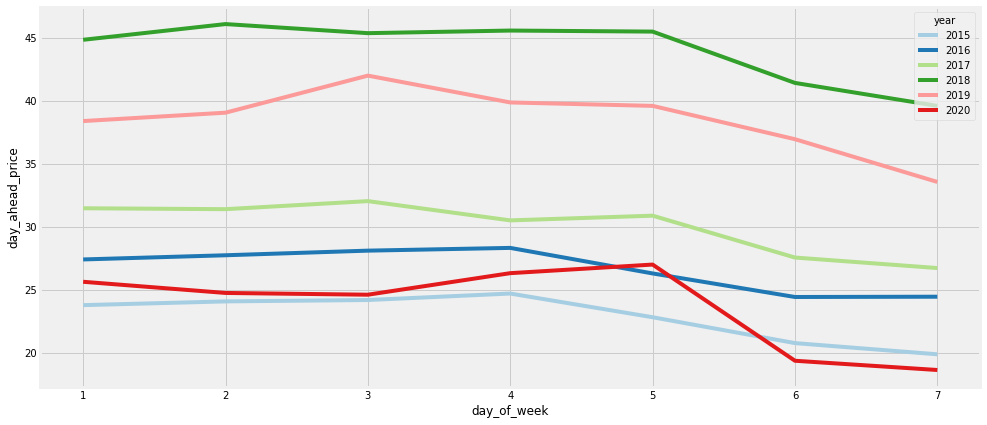

In [585]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_week",y='day_ahead_price',hue="year",data=loads,ci=None,palette="Paired");

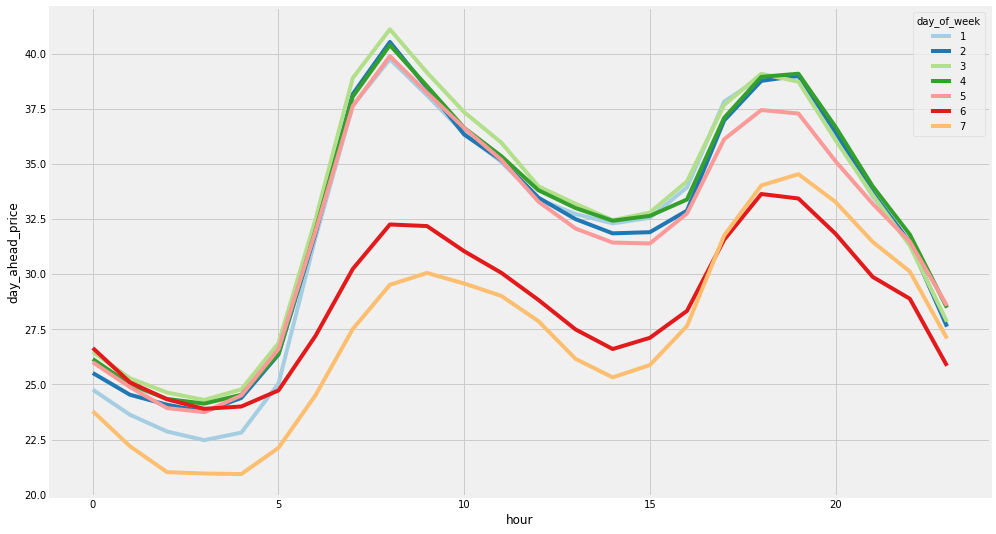

In [586]:
plt.figure(figsize=(15,9))
sns.lineplot(x="hour",y='day_ahead_price',hue="day_of_week",data=loads,ci=None,palette="Paired");

#### Prices - Month seasonality

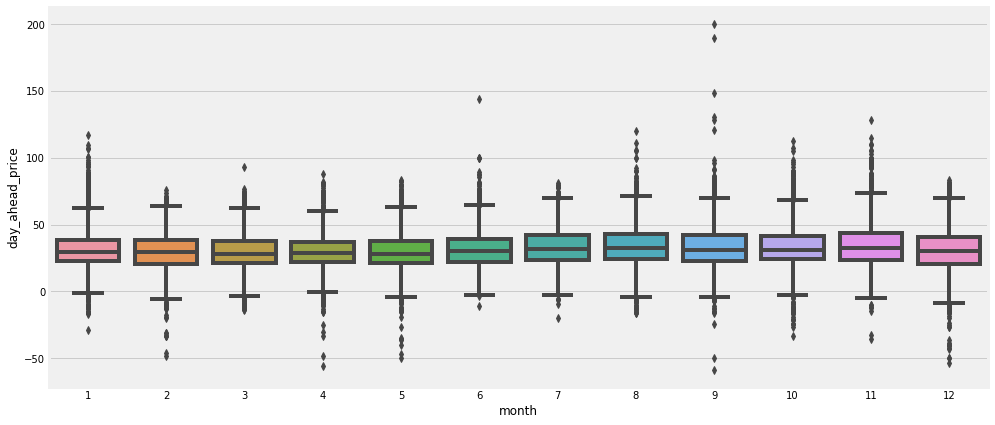

In [587]:
plt.figure(figsize=(15,7))
sns.boxplot(data=loads, x="month", y='day_ahead_price');

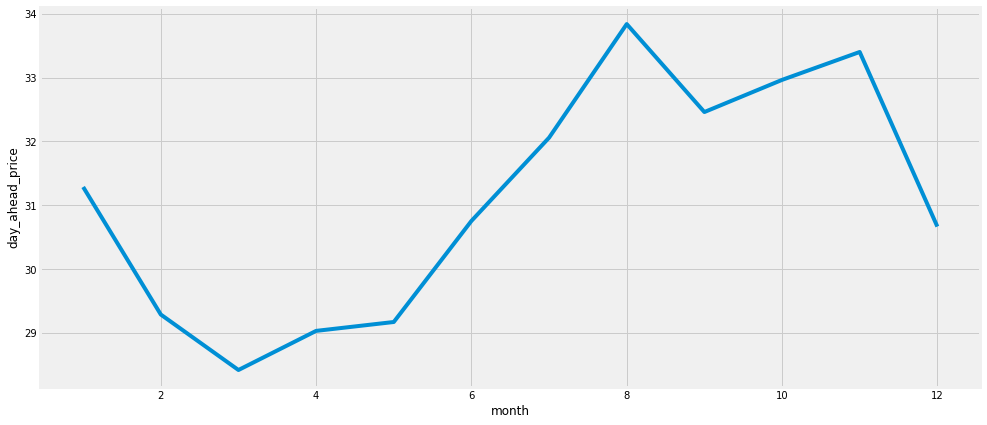

In [588]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x="month", y="day_ahead_price",ci=None);

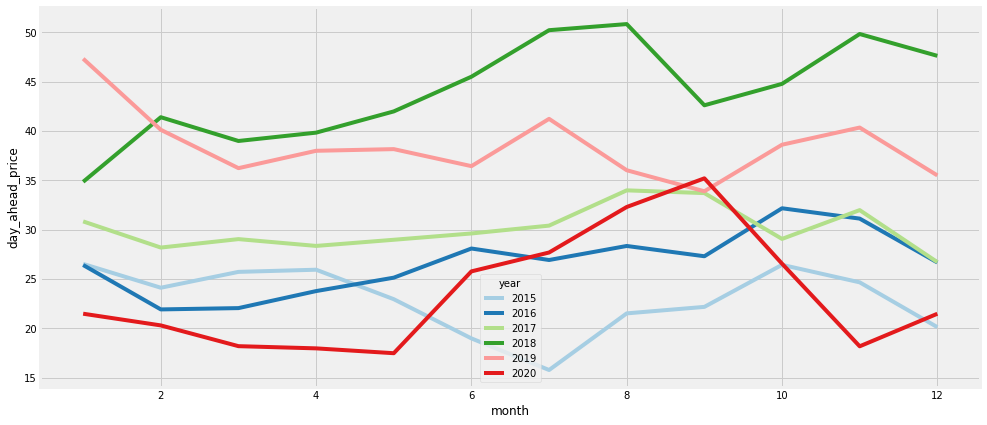

In [589]:
plt.figure(figsize=(15,7))
sns.lineplot(x="month",y='day_ahead_price',hue="year",data=loads,ci=None,palette="Paired");

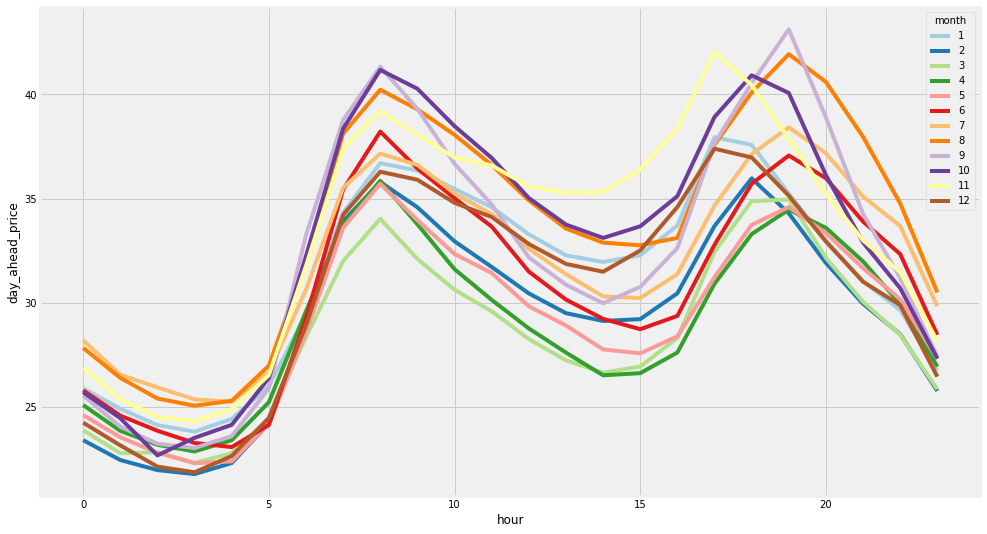

In [590]:
plt.figure(figsize=(15,9))
sns.lineplot(x="hour",y='day_ahead_price',hue="month",data=loads,ci=None,palette="Paired");

### Autocorrelation

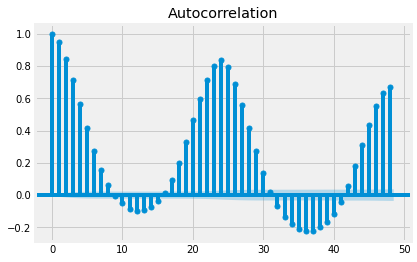

In [532]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(loads.total_demand, lags=48);

24 hours cycles ? with a loss of correlation every other day

### Decomposition

#### Demand

In [669]:
add_result_load = seasonal_decompose(loads["total_demand"],model="additive",period=24*365)

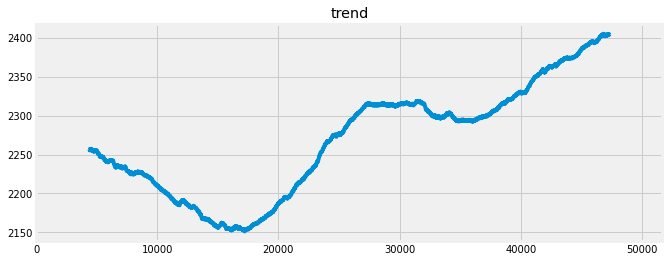

In [665]:
plt.figure(figsize=(10,4))
add_result_load.trend.plot(title="trend");

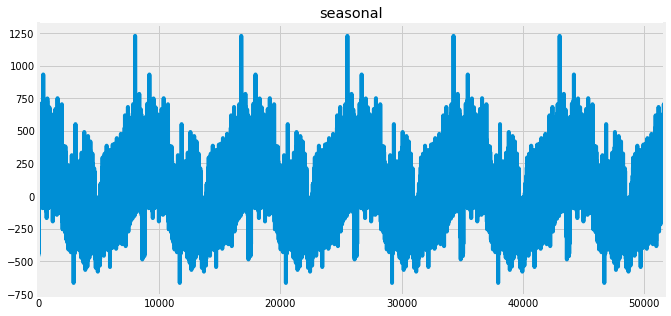

In [666]:
plt.figure(figsize=(10,5))
add_result_load.seasonal.plot(title="seasonal");

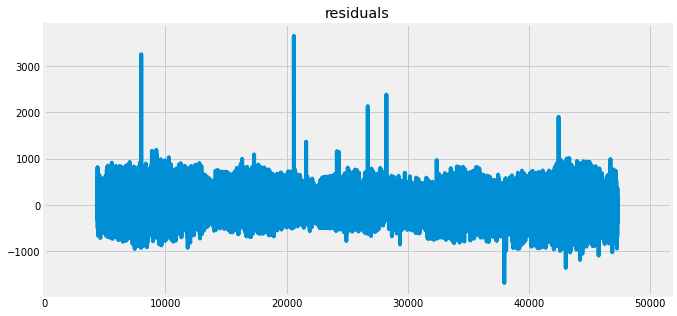

In [667]:
plt.figure(figsize=(10,5))
add_result_load.resid.plot(title="residuals");

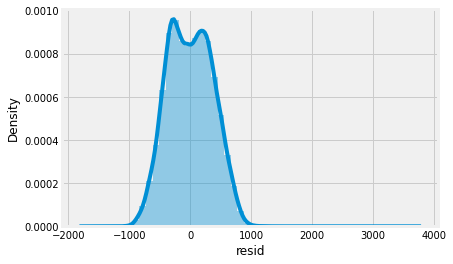

In [668]:
sns.distplot(add_result_load.resid);

Bimodal distribution of residuals ???

#### Prices

In [659]:
from statsmodels.tsa.seasonal import seasonal_decompose
add_result = seasonal_decompose(loads["day_ahead_price"],model="additive",period=24*365)

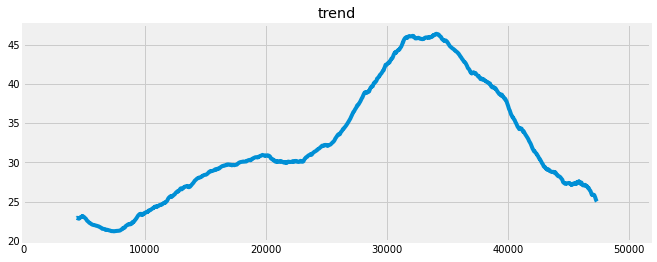

In [660]:
plt.figure(figsize=(10,4))
add_result.trend.plot(title="trend");

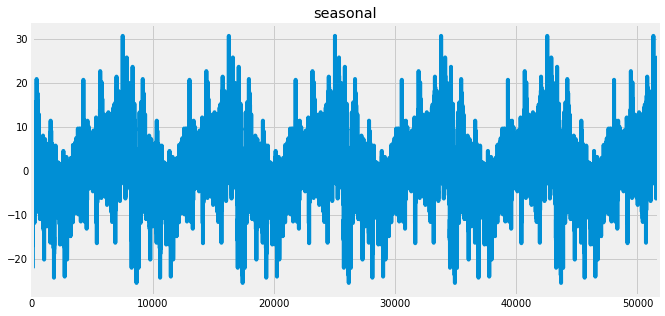

In [661]:
plt.figure(figsize=(10,5))
add_result.seasonal.plot(title="seasonal");

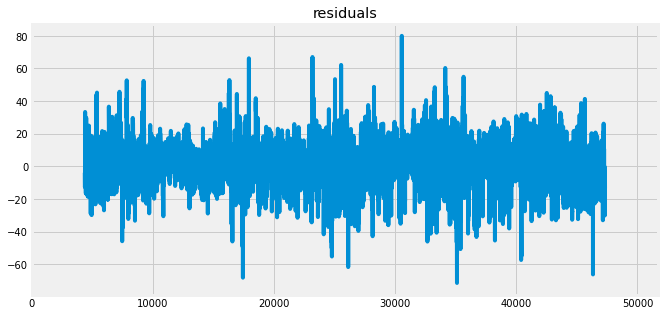

In [662]:
plt.figure(figsize=(10,5))
add_result.resid.plot(title="residuals");

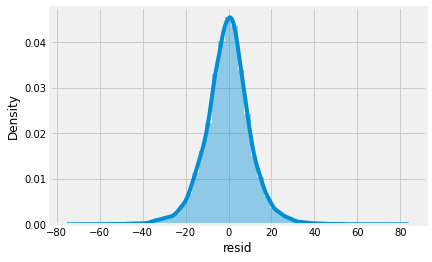

In [663]:
sns.distplot(add_result.resid);

Residuals are normally distributed ==> Mean is close to zero

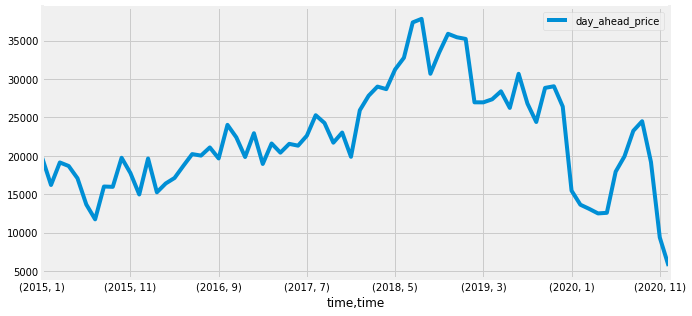

In [315]:
from warnings import filterwarnings
filterwarnings("ignore")
monthly_loads = loads[["time","plt.figure(figsize=(10,4))"]].groupby([loads["time"].dt.year,loads["time"].dt.month]).sum().plot(figsize=(10,5))